In [1]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd
from pprint import pprint
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import StratifiedKFold
from scipy import stats
import numpy as np
from sklearn import linear_model, svm
import re
from sklearn.metrics import roc_curve, auc,f1_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
#s = "../braindata/data_1_mor_select_100.csv"
import os          
from sklearn import linear_model, svm
from sklearn.ensemble import ExtraTreesClassifier
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from sklearn import svm, grid_search
from sklearn.model_selection import GridSearchCV

##read the data and clean data
def data_fetch_clean(file,type):
    #os.getcwd()
    #os.chdir('../braindata')
    dd =pd.read_csv(file,header=0)
    print(dd.shape)
    import csv

    with open(file, 'r') as f:
        d_reader = csv.DictReader(f)

        #get fieldnames from DictReader object and store in list
        headers = d_reader.fieldnames
    data=np.array(dd)
    #print(data.shape)
    idx_IN_columns = np.append(np.array([9,17]),np.array(range(18,data.shape[1])))
   # idx_IN_columns = np.append(np.array([3]),np.array(range(11,data.shape[1])))

    print(idx_IN_columns)
    X=data[:,idx_IN_columns]
    #features=data[:,11:data.shape[1]]
    #features = features.transpose()
    X = stats.zscore(X)
    #print(features.shape)
    y=data[:,type]
#/ 6:AD-normal / 7:AD-MCI / 8:MCI-normal 


    ind_num=np.isnan(y)
    # print(ind_num.shape)


    y_no_nan = y[~ind_num]

    X_no_nan = X[~ind_num,:]

           # print(y.shape)

    y=y_no_nan
    X=X_no_nan
    feature_num_all=[]
    lr_all_feature=[]
    svm_all_feature=[]
    lr_fls_feature=[]
    svm_fls_feature=[]
    base_labels= []

    np.isnan(X).any()

    X[np.isnan(X)] = np.median(X[~np.isnan(X)])
    return X,y

/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd
from pprint import pprint
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import StratifiedKFold
from scipy import stats
import numpy as np
from sklearn import linear_model, svm
import re
from sklearn.metrics import roc_curve, auc,f1_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
#s = "../braindata/data_1_mor_select_100.csv"
import os          
from sklearn import linear_model, svm
from sklearn.ensemble import ExtraTreesClassifier
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from sklearn import svm, grid_search
from sklearn.model_selection import GridSearchCV

##read the data and clean data
def data_fetch_clean(file,type):
    #os.getcwd()
    #os.chdir('../braindata')
    dd =pd.read_csv(file,header=0)
    print(dd.shape)
    import csv

    with open(file, 'r') as f:
        d_reader = csv.DictReader(f)

        #get fieldnames from DictReader object and store in list
        headers = d_reader.fieldnames
    data=np.array(dd)
    #print(data.shape)
    idx_IN_columns = np.append(np.array([9,17]),np.array(range(18,data.shape[1])))
   # idx_IN_columns = np.append(np.array([3]),np.array(range(11,data.shape[1])))

    print(idx_IN_columns)
    X=data[:,idx_IN_columns]
    #features=data[:,11:data.shape[1]]
    #features = features.transpose()
    X = stats.zscore(X)
    #print(features.shape)
    y=data[:,type]
#/ 6:AD-normal / 7:AD-MCI / 8:MCI-normal 


    ind_num=np.isnan(y)
    # print(ind_num.shape)


    y_no_nan = y[~ind_num]

    X_no_nan = X[~ind_num,:]

           # print(y.shape)

    y=y_no_nan
    X=X_no_nan
    feature_num_all=[]
    lr_all_feature=[]
    svm_all_feature=[]
    lr_fls_feature=[]
    svm_fls_feature=[]
    base_labels= []

    np.isnan(X).any()

    X[np.isnan(X)] = np.median(X[~np.isnan(X)])
    return X,y

#classification and cross validation 
def main(X,y,svm_para,lr_para,cv,re,name,n_features,path_to_save):
    logistic = linear_model.LogisticRegression(C=lr_para["C"])
    rbf = svm.SVC(C=svm_para["C"],kernel='linear',gamma=svm_para["gamma"])

    skf=RepeatedStratifiedKFold(n_splits=cv, n_repeats=re)
    lr_all_accs = []
    lr_all_scores = []
    lr_f1s = []
    svm_all_accs = []
    svm_all_scores = []
    svm_f1s = []

    lr_accuracies = []
    lr_scores = []
    svm_accuracies = []
    svm_scores = []
    strat_labels = []


    for train_index, test_index in skf.split(X, y):

            train_data, test_data = X[train_index], X[test_index]
            train_labels, test_labels = y[train_index], y[test_index]
            strat_labels = np.append(strat_labels, test_labels)

            clf = ExtraTreesClassifier(n_estimators=10000, random_state=0)
            clf = clf.fit(train_data, train_labels)
            importances = clf.feature_importances_
            importances
            indices = np.argsort(importances)[::-1]
            #print("Feature ranking:")
            #print(train_labels.shape)
            #for f in range(X.shape[1]):
            #    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
            #n_features = [10,30,50,70,80,100,1000,2000,13000,18000,10000,20000,3000,30000,4000,500,5000,6000,7000,8000,9000,15000,25000]
            #n_features = [1000]
            n_features.sort()



            for i in n_features:


                index=indices[0:i]
                #print(index.shape)
                features=train_data[:,index]

                feature_num=features.shape[1]
                #print(feature_num)


                #train_data, test_data = features[train_index], features[test_index]
                #train_labels, test_labels = y[train_index], y[test_index]


                log = logistic.fit(train_data[:,index], train_labels)
                #print(train_data[:,index].shape)
                log_prob = log.decision_function(test_data[:,index])
                log_acc = log.score(test_data[:,index], test_labels)

                #f1 calculation
                y_pred = logistic.predict(test_data[:,index])
                log_f1 = f1_score(test_labels, y_pred)

                lr_accuracies = np.append(lr_accuracies, log_acc)
                lr_scores = np.append(lr_scores, log_prob)
                lr_f1s = np.append(lr_f1s, log_f1)
                #print('Logistic Regression Accuracy: %f' % log_acc)

                rbf = rbf.fit(train_data[:,index], train_labels)
                svm_acc = rbf.score(test_data[:,index], test_labels)
                svm_prob = rbf.decision_function(test_data[:,index])

                #f1 calculation
                y_pred = rbf.predict(test_data[:,index])
                svm_f1 = f1_score(test_labels, y_pred)
                #print('SVM Accuracy: %f' % svm_acc)
                svm_accuracies = np.append(svm_accuracies, svm_acc)
                svm_scores = np.append(svm_scores, svm_prob)
                svm_f1s = np.append(svm_f1s, svm_f1)
                #print('SVM f1: %f' % svm_f1)


                lr_all_scores = np.append(lr_all_scores, lr_scores)
                lr_fold_avg = np.mean(lr_accuracies)
                lr_all_accs = np.append(lr_all_accs, lr_fold_avg)
                svm_all_scores = np.append(svm_all_scores, svm_scores)
                svm_fold_avg = np.mean(svm_accuracies)
                svm_all_accs = np.append(svm_all_accs, svm_fold_avg)
                #print('Logistic Regression Accuracy: %f' % log_acc_avg)
                #print('SVM Regression Accuracy: %f' % svm_acc_avg)
                #feature_num_all=np.append(feature_num_all,feature_num)
                #print(feature_num_all)
                # print(np.mean(lr_all_accs))
                #print(np.mean(svm_all_accs))      
                #lr_all_feature=np.append(lr_all_feature,np.mean(lr_all_accs))
                ##svm_all_feature=np.append(svm_all_feature,np.mean(svm_all_accs))
                #lr_fls_feature=np.append(lr_fls_feature,np.mean(lr_f1s))
                #svm_fls_feature=np.append(svm_fls_feature,np.mean(svm_f1s))
                #base_labels_all = np.append(base_labels_all,strat)
                #base_labels = np.append(base_labels, np.mean(strat_labels))



    lracc=lr_all_accs.reshape(len(n_features),int(lr_all_accs.shape[0]/len(n_features)))
    lrcc=np.mean(lracc,axis=1)
    #print(np.max(lracc))
    svmacc=svm_all_accs.reshape(len(n_features),int(lr_all_accs.shape[0]/len(n_features)))
    svmcc=np.mean(svmacc,axis=1)
    #np.max(svmcc)
   # return lrcc, svmcc,n_features

    import matplotlib.pyplot as plt

    plt.figure()
    plt.plot( (n_features), lrcc*100, lw=5,label='Logistic Regression')
    plt.plot( (n_features), svmcc*100, lw=5,label='SVM')
    plt.xlim([0, 30000])
    plt.ylim([0, 100])
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.title(name)

    plt.legend(loc="lower right")
    path=path_to_save + name+'.pdf'
    #path='../Fig/'+ name+'.pdf'
    print(path)
    plt.savefig(path)
    plt.show()
    return lrcc, svmcc,importances,lracc,svmacc 
    
    

In [6]:
def accuracy_roc_save(X,y,lrcc,svmcc,name,cv,re, importances,path_to_save):


    lrindex=np.argmax(lrcc)
    #print("LR Maximum feature number is: {}".format(feature_num_all[lrindex]),file=open("../Fig/MCIvsSMIaccuracy.txt", "a"))
    svmindex=np.argmax(svmcc)
    #print("SVM Maximum feature is number : {}".format(feature_num_all[svmindex]),file=open("../Fig/MCIvsSMIaccuracy.txt", "a"))
    

#     clf = ExtraTreesClassifier(n_estimators=10000,random_state=0)
#     clf = clf.fit(X, y)
#     importances=clf.feature_importances_
#     # # #importances
#     indices = np.argsort(importances)[::-1]
    # print("Feature ranking:")

    # for f in range(100):
    #     print("%d. feature %d %s (%f)" % (f + 1, indices[f],headers[indices[f]],importances[indices[f]]),file=open("../Fig/MCIvsSMI_rank.txt", "a"))

    from sklearn import metrics
    from sklearn.metrics import roc_curve, auc,f1_score
    
    if np.max(svmcc)>np.max(lrcc):
        max_features = n_features[svmindex]
    else:
        max_features = n_features[lrindex]

    print(max_features)
    lr_all_accs = []
    lr_all_scores = []
    lr_f1s = []
    svm_all_accs = []
    svm_all_scores = []
    svm_f1s = []
    base_labels = []
    lr_sensitivity= []
    svm_sensitivity=[]
    lr_specificity=[]
    svm_specificity=[]

    #index=indices[0:int(max_features)]
    #features=X[:,index]
    #feature_num=features.shape[1]
    for runs in range(1):
        lr_accuracies = []
        lr_scores = []
        svm_accuracies = []
        svm_scores = []
        strat_labels = []

        logistic = linear_model.LogisticRegression(C=lr_para["C"])
        rbf = svm.SVC(C=svm_para["C"],kernel='linear',gamma=svm_para["gamma"])
        from sklearn.metrics import roc_curve, auc,f1_score
        
        skf=RepeatedStratifiedKFold(n_splits=cv, n_repeats=re)
        for train_index, test_index in skf.split(X, y):
                    train_data, test_data = X[train_index], X[test_index]
                    train_labels, test_labels = y[train_index], y[test_index]
                    #print(train_data.shape)
                    strat_labels = np.append(strat_labels, test_labels)
                    
            
                    clf = ExtraTreesClassifier(n_estimators=10000, random_state=0)
                    clf = clf.fit(train_data, train_labels)
                    importances = clf.feature_importances_
                   
                    indices = np.argsort(importances)[::-1]
                    
                    
                    index=indices[0:int(max_features)]
                    #features=X[:,index]
                     # feature_num=features.shape[1]
                    
                    
                  
                    log = logistic.fit(train_data[:,index], train_labels)
                    log_prob = log.decision_function(test_data[:,index])
                    log_acc = log.score(test_data[:,index], test_labels)

                #f1 calculation
                    y_pred = logistic.predict(test_data[:,index])
                    log_f1 = f1_score(test_labels, y_pred)
                    log_confuse= metrics.confusion_matrix(test_labels, y_pred)
                    TP = log_confuse[1, 1]
                    TN = log_confuse[0, 0]
                    FP = log_confuse[0, 1]
                    FN = log_confuse[1, 0]
                    log_sen=metrics.recall_score(test_labels, y_pred)
        #             print(TN)
        #             print(FP)
                    log_spec=TN / (TN + FP)
        #             print(log_confuse)
        #             print(log_sen)
        #             print(log_spec)

                    lr_accuracies = np.append(lr_accuracies, log_acc)
                    lr_sensitivity=np.append(lr_sensitivity, log_sen)
                    lr_specificity=np.append(lr_specificity, log_spec)

                    lr_scores = np.append(lr_scores, log_prob)
                    lr_f1s = np.append(lr_f1s, log_f1)

                    #print('Logistic Regression Accuracy: %f' % log_acc)

                    rbf = rbf.fit(train_data[:,index], train_labels)
                    svm_acc = rbf.score(test_data[:,index], test_labels)
                    svm_prob = rbf.decision_function(test_data[:,index])

                #f1 calculation
                    y_pred = rbf.predict(test_data[:,index])
                    svm_f1 = f1_score(test_labels, y_pred)
                    svm_confuse= metrics.confusion_matrix(test_labels, y_pred)
                    TP = log_confuse[1, 1]
                    TN = log_confuse[0, 0]
                    FP = log_confuse[0, 1]
                    FN = log_confuse[1, 0]
                    svm_sen=metrics.recall_score(test_labels, y_pred)
                    svm_spec=TN / (TN + FP)



                    svm_accuracies = np.append(svm_accuracies, svm_acc)
                    svm_sensitivity=np.append(svm_sensitivity, svm_sen)
                    svm_specificity=np.append(svm_specificity, svm_spec)

                    #print('SVM Accuracy: %f' % svm_acc)
                    #svm_accuracies = np.append(svm_accuracies, svm_acc)
                    svm_scores = np.append(svm_scores, svm_prob)
                    svm_f1s = np.append(svm_f1s, svm_f1)

        base_labels = np.append(base_labels, strat_labels)
        lr_all_scores = np.append(lr_all_scores, lr_scores)
        lr_fold_avg = np.mean(lr_accuracies)
        lr_all_accs = np.append(lr_all_accs, lr_fold_avg)
        svm_all_scores = np.append(svm_all_scores, svm_scores)
        svm_fold_avg = np.mean(svm_accuracies)
        svm_all_accs = np.append(svm_all_accs, svm_fold_avg)


    txt_file=path_to_save + name + "accuracy.txt"
    print("LR accuracy Avg: {}".format(np.mean(lr_accuracies)),file=open(txt_file, "a"))
    print("LR accuracy Standard Deviation: {}".format(np.std(lr_accuracies)),file=open(txt_file, "a"))
    print("LR sensitivity Avg: {}".format(np.mean(lr_sensitivity)),file=open(txt_file, "a"))
    print("LR sensitivity Standard Deviation: {}".format(np.std(lr_sensitivity)),file=open(txt_file, "a"))
    print("LR specificity Avg: {}".format(np.mean(lr_specificity)),file=open(txt_file, "a"))
    print("LR specificity Standard Deviation: {}".format(np.std(lr_specificity)),file=open(txt_file, "a"))
    print("LR f1s Avg : {}".format(np.mean(lr_f1s)),file=open(txt_file, "a"))
    print("LR f1s Standard Deviation: {}".format(np.std(lr_f1s)),file=open(txt_file, "a"))

    print("SVM Avg: {}".format(np.mean(svm_accuracies)),file=open(txt_file, "a"))
    print("SVM Standard Deviation: {}".format(np.std(svm_accuracies)),file=open(txt_file, "a"))
    print("SVM sensitivity Avg: {}".format(np.mean(svm_sensitivity)),file=open(txt_file, "a"))
    print("SVM sensitivity Standard Deviation: {}".format(np.std(svm_sensitivity)),file=open(txt_file, "a"))
    print("SVM specificity Avg: {}".format(np.mean(svm_specificity)),file=open(txt_file, "a"))
    print("SVM specificity Standard Deviation: {}".format(np.std(svm_specificity)),file=open(txt_file, "a"))
    print("SVM f1s Avg : {}".format(np.mean(svm_f1s)),file=open(txt_file, "a"))
    print("SVM f1s Standard Deviation: {}".format(np.std(svm_f1s)),file=open(txt_file, "a"))
    #lrindex=np.argmax(lr_all_feature)
    # print("LR Maximum feature number is: {}".format(feature_num_all[lrindex]),file=open(txt_file, "a"))
    #svmindex=np.argmax(svm_all_feature)
    # print("SVM Maximum feature is number : {}".format(feature_num_all[svmindex]),file=open(txt_file, "a"))

    ###############################################################################################################

    from sklearn.metrics import roc_curve, auc,f1_score
    import matplotlib.pyplot as plt

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    fpr['lr'], tpr['lr'], _ = roc_curve(base_labels, lr_all_scores)
    roc_auc['lr'] = auc(fpr['lr'], tpr['lr'])
    #f1['lr']=f1_score(fpr['lr'], tpr['lr'])
    fpr['svm'], tpr['svm'], _ = roc_curve(base_labels, svm_all_scores)
    roc_auc['svm'] = auc(fpr['svm'], tpr['svm'])
    #f1['svm']=f1_score(fpr['svm'], tpr['svm'])
    #fpr['gcn'], tpr['gcn'], _ = roc_curve(all_labels, all_scores)
    #roc_auc['gcn'] = auc(fpr['gcn'], tpr['gcn'])

    plt.figure()
    plt.plot(fpr['lr'], tpr['lr'], lw=5, label='Logistic Regression (area = %0.2f)' % roc_auc['lr'] )
    #plt.plot(fpr['lr'], tpr['lr'], lw=3, label='Logistic Regression (f1 = %0.2f)' % f1['lr'] )

    plt.plot(fpr['svm'], tpr['svm'], lw=5, label='SVM (area = %0.2f)' % roc_auc['svm'] )
    #plt.plot(fpr['svm'], tpr['svm'f], lw=3, label='SVM (f1 = %0.2f)' % f1['svm'] )
    #plt.plot(fpr['gcn'], tpr['gcn'], lw=3, label='GCN (area = %0.2f)' % roc_auc['gcn'])
    plt.plot([0, 1], [0, 1], color='navy', lw=5, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name)
    plt.legend(loc="lower right") 
    #plt.savefig('10x_Combined_ROC.eps')
    #plt.savefig('ROC_MCIVsNormal_connectome.eps')
    #plt.show()
    roc_path=path_to_save+"ROC_"+name+"_connectome.pdf"
    plt.savefig(roc_path)

In [7]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

def lr_param_selection(X, y, nfolds):
    Cs = [1000,10000,10e5,10e6]
    # gammas = [0.001, 0.01, 0.1, 1] 
    param_grid = {'C': Cs}
    grid_search = GridSearchCV(linear_model.LogisticRegression(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

ok
(179, 34728)
[    9    17    18 ... 34725 34726 34727]


/Users/posnerlab/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2248: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWar

/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.

/Users/posnerlab/Dropbox (NYSPI)/00 AD ML/0papers/idp_jiook/Fig_adni/AD vs MCI.pdf


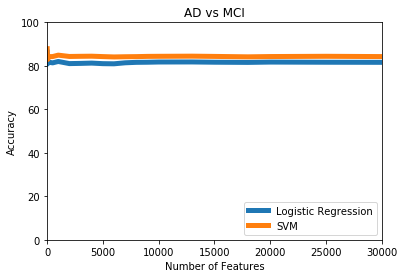

10


/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.

/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.

(179, 34728)
[    9    17    18 ... 34725 34726 34727]


/Users/posnerlab/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2248: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWar

/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.

/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/posnerlab/miniconda3/lib/python3.

In [ ]:
import os
cwd=os.getcwd()
os.chdir('/Users/posnerlab/Dropbox (NYSPI)/00 AD ML/0papers/idp_jiook/data/adni')
filename="combine_new.csv"
path_to_save="/Users/posnerlab/Dropbox (NYSPI)/00 AD ML/0papers/idp_jiook/Fig_adni/"

os.path.isdir(path_to_save)
if os.path.isdir(path_to_save):
    print("ok")
else:
    print("no this directory")
    os.mkdir(path_to_save)
    
#n_features = [1000,2000]

n_features = [10,30,50,70,80,100,1000,2000,13000,18000,10000,20000,3000,30000,4000,500,5000,6000,7000,8000,9000,15000,25000]
save_name=["AD vs SMC","AD vs MCI","MCI vs SMC"]
for i in range(6,9):

    X,y=data_fetch_clean(filename,i)

    #/ 6:AD-normal / 7:AD-MCI / 8:MCI-normal 
    name=save_name[i-5]
    svm_para=svc_param_selection(X,y,10)
    lr_para=lr_param_selection(X,y,10)
    
    # this is the main function 
    lrcc,svmcc,importances,lracc,svmacc=main(X,y,svm_para,lr_para,10,10,name,n_features,path_to_save) # 10 fold, repeat number, and the name to save; 
    accuracy_roc_save(X,y,lrcc,svmcc,name,10,10,importances,path_to_save)
    

In [10]:
print(svmcc)
print(lrcc)


[0.86757377 0.84984918]
[0.90437729 0.83809824]
